In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

e:\Projects\Image_Generation\image_generation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(torch.cuda.is_available())

True


In [3]:
modelid = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(modelid, revision="fp16", torch_dtype=torch.float16)
pipe.to("cuda")

e:\Projects\Image_Generation\image_generation\Lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [8]:
prompt = "a cat on mars, 4k, high resolution"

generator = torch.Generator("cuda")

image = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

image.save(f"output.png")

100%|██████████| 50/50 [03:33<00:00,  4.26s/it]
e:\Projects\Image_Generation\image_generation\Lib\site-packages\diffusers\utils\pil_utils.py:38: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [3]:

import torch
from diffusers import DiffusionPipeline


In [5]:
model_id = "runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")
generator = torch.Generator("cuda").manual_seed(0)




`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [8]:
prompt = "portrait photo of a old warrior chief"

image = pipeline(prompt, guidance_scale=7.5, generator=generator).images[0]

image.save("output_new.png")

100%|██████████| 50/50 [03:54<00:00,  4.68s/it]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [9]:
import diffusers

pipeline.scheduler.compatibles
[
    diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
    diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
    diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
    diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
    diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
    diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
    diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
    diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
    diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
    diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
    diffusers.schedulers.scheduling_pndm.PNDMScheduler,
    diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
    diffusers.schedulers.scheduling_ddim.DDIMScheduler,
]

[diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler]

In [10]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

100%|██████████| 20/20 [01:32<00:00,  4.60s/it]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


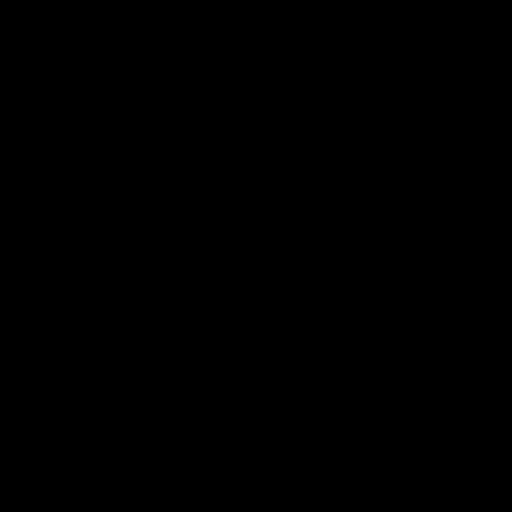

In [11]:
generator = torch.Generator("cuda").manual_seed(0)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image

In [12]:
def get_inputs(batch_size=1):
    generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
    prompts = batch_size * [prompt]
    num_inference_steps = 20

    return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}


In [14]:
import PIL
from PIL import image


def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

ImportError: cannot import name 'image' from 'PIL' (e:\Projects\Image_Generation\image_generation\Lib\site-packages\PIL\__init__.py)

In [ ]:
images = pipeline(**get_inputs(batch_size=4)).images
image_grid(images)

In [ ]:
pipeline.enable_attention_slicing()

In [ ]:
images = pipeline(**get_inputs(batch_size=8)).images
image_grid(images, rows=2, cols=4)

In [ ]:
from diffusers import AutoencoderKL

vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-mse", torch_dtype=torch.float16).to("cuda")
pipeline.vae = vae
images = pipeline(**get_inputs(batch_size=8)).images
image_grid(images, rows=2, cols=4)

In [ ]:
prompt += ", tribal panther make up, blue on red, side profile, looking away, serious eyes"
prompt += " 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"

In [ ]:
images = pipeline(**get_inputs(batch_size=8)).images
image_grid(images, rows=2, cols=4)

In [ ]:
prommpts = [
    "portrait photo of the oldest warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
    "portrait photo of a old warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
    "portrait photo of a warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
    "portrait photo of a young warrior chief, tribal panther make up, blue on red, side profile, looking away, serious eyes 50mm portrait photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta",
]

generator = [torch.Generator("cuda").manual_seed(1) for _ in range(len(prompts))]
images = pipeline(prompt=prompts, generator=generator, num_inference_steps=25).images
image_grid(images)